<a href="https://colab.research.google.com/github/Natural-Language-Processing-YU/Module-5-Assignment/blob/main/scripts/M2_Assignment_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part III:  Machine Learning and Deep Neural Networks with NLP

Next we will move to Machine Learning Models and the Introduction of Deep Neural networks for NLP.

In this section, we will cover:


1.   Refresher on Machine Learning and Shallow Learning Approach
2.   Introduction to Neural Networks and Deep Learning
3.   Sequence Models with Neural Networks

## Setup
As part of completing the assignment, you will see that there are areas in the note book for you to complete your own coding input.

It will be look like following:
```
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
'Some coding activity for you to complete'
### END CODE HERE ###

```
Please be sure to fill these code snippets out as you turn in your assignment.

### 3.1 Machine Learning for NLP
Recall that we can use our techniques to create predictive algorithms and solve common NLP tasks/goals such as sentiment analysis, text summarization, question-answering, etc. These tasks, you will find, are greatly improved with Deep Learning and Neural Networks.


![Artificial Intelligence](https://drive.google.com/uc?export=view&id=1cMW6E4PiVPvxvlfS7IxrBNkv2byAelXy)


Before move towards understanding the NN used for NLP, let's briefly refresh our understanding of Machine Learning, or shallow learning techniques.

There are several fundamental steps to any Machine Learning algorithm. Typically, they follow these steps below.

![basic ML](https://drive.google.com/uc?export=view&id=1cNhv3qDj_j8Mvga274azmRYJ0LzC2bxx)

One of the most common use cases is classification of data. We use a supervised machine learning model where some body of text are classified or labeled. may create an input vector that we must use feature engineering techniques as an input to the ML algorithm. This often means altering the data and making assumptions about the variables in the data that we believe are most pertinent to the predictability of the data. An example is the Naive Bayes and Bag-of-Words representation.

To train a model -- for example, training a logistic regression model to determine whether or not a movie review is positive or negative, for example-- we split the labeled data into a training and test sets. First, we will run the algorithm on the training test data, and then evaluate its efficacy. Then, we run the test dataset through the model to evaluate its performance.

As we evaluate the performance of the model, we tune "hyperparameters". Hyperparameters are inputs to our model that have an influence on the models' performance. They are most often inputs by humans and determined through a series of heuristics and they result in estimates to the model parametters. For example, the percentage of data split between a training and test set is a heuristic -- or rule of thumb-- where we often choose 80% of the labeled data to train our model, and 20% to test it.



#### 3.1.1 Example: ML Approach with NLP - Sentiment Analysis Using Bag-of-Words
We often call the Naïve Bayes classifier the bag-of-words approach. That’s because we are essentially throwing in the collection of words into a ‘bag’, selecting a word at random, and then calculating their frequency to use in the Bayesian Inference. Thus, context – the position of words -- is ignored and despite this, it turns out that the Naïve Bayes approach can be accurate and effective at determining whether an email is spam for example.


###### 3.1.1.1 Load the Dataset and Inspect the data.

In [3]:
#from: https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/ml-sklearn-classification.html#data-loading
#import libraries
import nltk, random
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load the data from nltk.corpus.moviereviews
print(len(movie_reviews.fileids()))
print(movie_reviews.categories())
print(movie_reviews.words()[:100])
print(movie_reviews.fileids()[:10])

#Rearrange the corpus data as a list of tuple, where the first element is the word tokens of the documents,
#and the second element is the label of the documents (i.e., sentiment labels).
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.seed(123)
random.shuffle(documents)

#Describe the dataset
print('Number of Reviews/Documents: {}'.format(len(documents)))  #Corpus Size (Number of Documents)
print('Corpus Size (words): {}'.format(np.sum([len(d) for (d,l) in documents]))) #Corpus Size (Number of Words)
print('Sample Text of Doc 1:') #Distribution of the Two Classes
print('-'*30)
print(' '.join(documents[0][0][:50])) # first 50 words of the first document

## Check Sentiment Distribution of the Current Dataset
from collections import Counter
sentiment_distr = Counter([label for (words, label) in documents])
print(sentiment_distr)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


2000
['neg', 'pos']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
Number of Reviews/Documents: 2000
Corpus Size (words): 1583820
Sample Text of Doc 1:
------------------------------
most movies seem to release a third movie just so it can be called a trilogy . rocky iii seems to kind of fit in that category , but manages to be slightly unique . the rocky formula of " rocky loses fight / rocky trains / rocky wins fight
Counter({'pos': 1000, 'neg': 1000})


###### 3.1.1.2 Split the data into a training and testing set.

Because in most of the ML steps, the feature sets and the labels are often separated as two units, we split our training data into X_train and y_train as the features (X) and labels (y) in training.

Likewise, we split our testing data into X_test and y_test as the features (X) and labels (y) in testing.

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(documents, test_size = 0.33, random_state=42)
## Sentiment Distrubtion for Train and Test
print(Counter([label for (words, label) in train]))
print(Counter([label for (words, label) in test]))

X_train = [' '.join(words) for (words, label) in train]
X_test = [' '.join(words) for (words, label) in test]
y_train = [label for (words, label) in train]
y_test = [label for (words, label) in test]

Counter({'neg': 674, 'pos': 666})
Counter({'pos': 334, 'neg': 326})


##### 3.1.1.3 Text Vectorization
In feature-based machine learning, we need to vectorize texts into feature sets (i.e., feature engineering on texts).

We use the naive bag-of-words text vectorization. In particular, we use the weighted version of BOW.



In [5]:
#Note: Always split the data into train and test first before vectorizing the texts.
#Otherwise, you would leak information to the training process, which may lead to over-fitting

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vec = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidf_vec.fit_transform(X_train) # fit train
X_test_bow = tfidf_vec.transform(X_test) # transform test

print(X_train_bow.shape)
print(X_test_bow.shape)

(1340, 6138)
(660, 6138)


##### 3.1.1.4 Model Selection and Cross Validation
For our current binary sentiment classifier, we will try a few common classification algorithms:

1.   Support Vector Machine
2.   Decision Tree
3.   Naive Bayes
4.   Logistic Regression

The common steps include:

1.   We fit the model with our training data.
2.   We check the model stability, using k-fold cross validation on the training data.
3.   We use the fitted model to make prediction.
4.   We evaluate the model prediction by comparing the predicted classes and the true labels.

###### 3.1.1.5.1 Support Vector Machines

In [7]:
from sklearn import svm

model_svm = svm.SVC(C=8.0, kernel='linear')
model_svm.fit(X_train_bow, y_train)

from sklearn.model_selection import cross_val_score
model_svm_acc = cross_val_score(estimator=model_svm, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
print(model_svm_acc)

model_svm.predict(X_test_bow[:10])
print(model_svm.score(X_test_bow, y_test))


[0.84328358 0.82089552 0.85447761 0.82462687 0.84701493]
0.8075757575757576


###### 3.1.1.5.2 Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

model_dec = DecisionTreeClassifier(max_depth=10, random_state=0)
model_dec.fit(X_train_bow, y_train)

model_dec_acc = cross_val_score(estimator=model_dec, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
model_dec_acc

model_dec.predict(X_test_bow[:10])

array(['pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg',
       'neg'], dtype='<U3')

###### 3.1.1.5.3 Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train_bow.toarray(), y_train)

model_gnb_acc = cross_val_score(estimator=model_gnb, X=X_train_bow.toarray(), y=y_train, cv=5, n_jobs=-1)
model_gnb_acc

model_gnb.predict(X_test_bow[:10].toarray())

array(['pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg'], dtype='<U3')

###### 3.1.1.5.3 Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()
model_lg.fit(X_train_bow, y_train)

model_lg_acc = cross_val_score(estimator=model_lg, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
model_lg_acc

model_lg.predict(X_test_bow[:10].toarray())

array(['pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos'], dtype='<U3')

##### 3.1.1.3 Evaluation

To evaluate each model’s performance, there are several common metrics in use:

Precision

1.   Precision
2.   Recall
3.   F-score
4.   Accuracy
5.   Confusion Matrix


0.8075757575757576
0.65
0.7015151515151515
0.7954545454545454
[0.80248834 0.81240768]
['neg' 'neg']


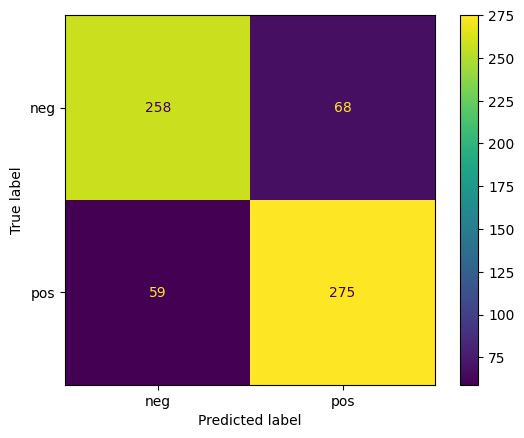

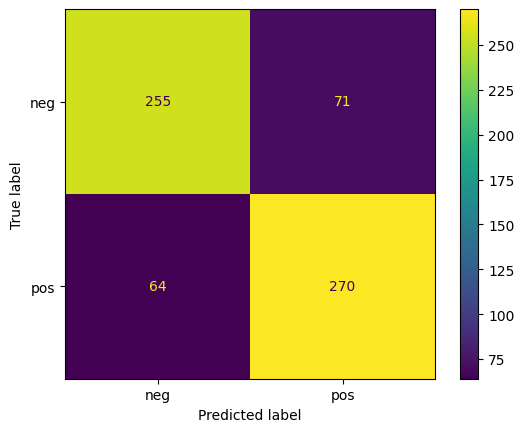

In [15]:
# Mean Accuracy
print(model_svm.score(X_test_bow, y_test))
print(model_dec.score(X_test_bow, y_test))
print(model_gnb.score(X_test_bow.toarray(), y_test))
print(model_lg.score(X_test_bow, y_test))

# F1 Score
from sklearn.metrics import f1_score

y_pred = model_svm.predict(X_test_bow)  # Corrected variable name here

print(f1_score(y_test, y_pred, average=None, labels=movie_reviews.categories()))

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(y_test, y_pred, labels=movie_reviews.categories())
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=movie_reviews.categories())
disp_svm.plot()

y_pred_lg = model_lg.predict(X_test_bow)
cm_lg = confusion_matrix(y_test, y_pred_lg, labels=movie_reviews.categories())
disp_lg = ConfusionMatrixDisplay(confusion_matrix=cm_lg, display_labels=movie_reviews.categories())
disp_lg.plot()

# Try a whole new self-created review
new_review = ['This book looks soso like the content but the cover is weird',
              'This book looks soso like the content and the cover is weird']
new_review_bow = tfidf_vec.transform(new_review)
print(model_svm.predict(new_review_bow))


##### 3.1.1.4 Tuning Hyperparameters
For each model, we have not optimized it in terms of its hyperparameter setting.

Now that SVM seems to perform the best among all, we take this as our base model and further fine-tune its hyperparameter using cross-validation and Grid Search.



In [17]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=10, n_jobs=-1) ## `-1` run in parallel
clf.fit(X_train_bow, y_train)


print(sorted(clf.cv_results_.keys()))

#We can check the parameters that yield the most optimal results in the Grid Search:

print(clf.best_params_)
print(clf.score(X_test_bow, y_test))

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
{'C': 1, 'kernel': 'linear'}
0.8106060606060606


### 3.2 Introduction to Neural Networks for NLP

With the advancement of computational efficiency and resource availability combined with the availability of large amounts of data came the rising importance of Neural Networks and Deep Learning. Especially as it pertains to NLP.

*What is Deep Learning?*
Deep Learning is a type of machine learning based on artifical neaural networks in which multiple layers of processing are used to extract progressively higher levels of features from data.

*What is used for?*
Common segments of Deep Learning include NLP tasks, image processing, and time/sequence data analysis like predicting stock market trends or the weather.

*How is it different from Machine Learning?*
There are several differences (but a lot more in common). Primarily, neural networks enable models to learn non-linear decision boundaries instead of strict linear boundaries. Moreover, Deep Learning notorious does away with feature extraction and engineering.

Non-linear decision boundaries compared to classical linear output for Machine Learning
![Artificial Intelligence](https://drive.google.com/uc?export=view&id=1cUbV4UZDThbmcKsJKKQGsreEOmkWQSeS)

ML vs DL
![Artificial Intelligence](https://drive.google.com/uc?export=view&id=1cSP4uxjq-8IL8xRiDN5xRHveTNnPoHp1)



#### 3.1.1 Types of Neural Networks
There are several types of Neural Networks that can be used to achieve different predictive goals. For example, we commonly use Convolutional Neural Networks to process image tasks (or non-sequential tasks) and we use a very of Recurrent Neural Networks to complete sequence-based tasks like time series for stock predictions or translating a sentence from left to right.

The following diagram shows the types of Networks that support sequential and non-sequential data.

![Neural Networks](https://drive.google.com/uc?export=view&id=12Ixtwys-z3_vv1ema0xyonYOffAWn5p1)

##### 2.1.2 Characteristics of the types of NN ([from Chen, 2020](https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/dl-neural-network-from-scratch.html))

*Multi-Layer Perceptron (Fully Connected Network)*
*   Input Layer, one or more hidden layers, and output layer
*  A hidden layer consists of neurons (perceptrons) which process certain aspect of the features and send the processed information into the next hidden layer.

*Convolutional Neural Network (CNN)*
*   Mainly for image and audio processing
*   Convolution Layer, Pooling Layer, Fully Connected Layer

*Recurrent Neural Network (RNN)*
*   fully-connected networks do not remember the steps from previous situations and therefore do not learn to make decisions based on context in training.
*  RNN stores the past information and all its decisions are taken from what it has learned from the past.
*   RNN is effective in dealing with time-series data (e.g., text, speech).
*   Preferred methods in NLP




#### 3.1.2 Characteristics of the Neural Network

The following image shows a basic forward propogation Neural Network![NN GIF](https://drive.google.com/uc?export=view&id=1cPN0fK69ncwFD-Idaesvc4LvSLDpHhbO)

Generically, a Neural Network will include  (from Chen, 2020):

*   **Forward Propagation**: the process of the model taking a series of inputs, manipulating and transforming them, running them through the hidden layers, and producing a predictive output layer.
*   **Backward Propagation**: the process of comparing the outputs of the model and then updating the weights in your model to adjust for the observed output compared to the expected output (called loss).
*   **Weights**: A vector of weights that are part of the "hidden layer". Weights are multiplied by the input layer or previous hidden layer to teach the model which neurons should be activated. Thus, they are an input into the neuron. The also get trained to be more accurate through backpropogation.
*   **Neurons**: The component of the Neural Network that is its namesake!. This allow us to model non-linear relationships between input and output data.
*   **Activation Functions**:  the activation function of a node determines whether the node would activate the output given the weighted sum of the input values.
*   **Nodes to Layers**: neural network can be defined in terms of depths and widths of its layers
*   **Layer, Parameters, and Matrix Mutiplication**: Each layer transforms the input values into the output values based on its layer parameters.
*   **Hyperparameters**: similar to ML, these are typically human inputs to the model to refine the models predictive efficacy.
*   **Loss Function**: If the target ouputs are numeric values, we can evaluate the errors. The loss function (termed cross entropy) represents the function of showing the actual distance of the observed output against the expected output. We can use this information to update our network to be better at predicting in our backpropogation process.
*   **Learning Rate and Gradient Descent**: Using the Loss Function, we can now perform the most important step in model training — adjusting the weights (i.e., parameters) of the model. This optimization method to finding a combination of weights that minimize the loss function. The learning rate is a hyperparameter that controls how fast the model learns.








#### 3.2.3 Example: Neural Network Approach for NLP

Please refer (here) [https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/dl-sentiment-case.html#prepare-data] for an example of NLP using various types of Neural Networks.,

### 3.3 Introduction to Recurrent Neural Networks

Recurrent neural network (RNN) "contains loops, allowing information to be stored within the network. In short, Recurrent Neural Networks use their reasoning from previous experiences to inform the upcoming events."

A common example of an RNN is machine translation. For example, the *sequence* of the sentence is used to translate from one language to another.


See the image below of the RNN Formula:

![Neural Networks](https://drive.google.com/uc?export=view&id=12OLUdjs-cDP--rRVU2DziuiWUYKUiruw)

See additional the different types of RNNs:![Neural Networks](https://drive.google.com/uc?export=view&id=12MRBEOEukvOzkZt6yvcQJwDwrHSj18dh)

Please read the following for a great Illustrated Guide to [Recurrent Neural Networks](https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9)


### 3.4 Exercise: Neural Network for NLP

Use the Brown corpus (nltk.corpus.brown) to create a trigram-based neural language model.

Please use the language model to generate 50-word text sequences using the seed text “The news”. Provide a few examples from your trained model.

A few important notes in data preprocessing:

When preparing the input sequences of trigrams for model training, please make sure the trigram does not span across “sentence boundaries”. You can utilize the sentence tokenization annotations provided by the ntlk.corpus.brown.sents().

The neural language model will be trained based on all trigrams that fulfill the above criterion in the entire Brown corpus.

When you use your trigram-based neural language model to generate sequences, please add randomness to the sampling of the next word. If you always ask the language model to choose the next word of highest predicted probability value, your text would be very repetitive.

Please provide your code response in the cell below:


In [1]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
import nltk
from nltk.corpus import brown
from nltk.util import ngrams
from collections import defaultdict
import random

# Download the Brown corpus if not already downloaded
nltk.download('brown')

# Load the Brown corpus and tokenize into sentences
sentences = brown.sents()

# Generate trigrams from the sentences (ignoring sentence boundaries)
trigrams = []
for sentence in sentences:
    trigrams.extend(list(ngrams(sentence, 3, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>')))

# Create a frequency distribution of trigrams
trigram_freq = defaultdict(int)
for trigram in trigrams:
    trigram_freq[trigram] += 1

# Total number of trigrams
total_trigrams = len(trigrams)

# Normalize the frequency to probabilities
trigram_prob = defaultdict(float)
for trigram, freq in trigram_freq.items():
    trigram_prob[trigram] = freq / total_trigrams

# Function to generate text based on trigram model
def generate_text(seed_text, length=50):
    text = seed_text.split()
    for _ in range(length):
        # Get the last two words to form the context
        context = tuple(text[-2:])

        # Find all trigrams that start with the context
        possible_trigrams = [trigram for trigram in trigram_prob if trigram[:2] == context]

        if not possible_trigrams:
            break

        # Select a trigram based on probabilities
        chosen_trigram = random.choices(possible_trigrams, weights=[trigram_prob[trigram] for trigram in possible_trigrams])[0]

        # Append the last word of the chosen trigram to the text
        text.append(chosen_trigram[-1])

    return ' '.join(text)

# Generate 5 sequences of 50 words each starting with "The news"
for i in range(5):
    generated_text = generate_text("The news", length=50)
    print(f"Generated Text {i+1}:")
    print(generated_text)
    print()

### END CODE HERE ###

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Generated Text 1:
The news of the points in the minds and hearts of students and 15 per cent . </s> </s>

Generated Text 2:
The news of a residential consumer might be expected to register today for the selection would be to provide research and information storage and retrieval . </s> </s>

Generated Text 3:
The news of a firm seat . </s> </s>

Generated Text 4:
The news of all , a big enough to give somebody else will I do now . </s> </s>

Generated Text 5:
The news of a representative of the world is in progress . </s> </s>



Examples of the 50-word text sequences created by the language model:

```
The news that was the first time was that the public interest in the first time he was '' and the in the of the state to the of the world of these theories '' and a few days '' he said that a note of the characteristics of the time of


The news of rayburn's commitment well known that mine '' he said '' he said he was in his own life and of the most part of the women have been the of her and mother '' said mrs buck have not been as a result of a group of the and


The news that is the basic truth in the next day to relax the emotional stimulation and fear that the author of the western world '' and said it was not a little more than the most of the state of the quarrel obtained a qualification that most of these forces as


The news and a little of the time we are never trying to find out what he has a small boy and a series of a new crisis the book was not a tax bill was not at the time of the white house would be to the extent to which he


The news of the church must be well to the extent of the most important element of the '' the end of the whole world '' he said he was in the of the '' of the and of the state of the is the of his new ideas that had been
```

##A. References

1.   Chapter 7 – Neural Networks. Daniel Jurafsky & James H. Martin. Copyright © 2021. All rights reserved. Draft of September 21, 2021.
2.   [Word2vec from Scratch with NumPy](https://towardsdatascience.com/word2vec-from-scratch-with-numpy-8786ddd49e72)
3.   [A hands=on intutive approach to Deep Learning Methods for Text Data - Word2Vec,GloVe and FastText](https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa)
4.    [Traditional Methods for Text Data](https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41)
5.    [Word Embeddings](https://colab.research.google.com/github/tensorflow/text/blob/master/docs/guide/word_embeddings.ipynb#scrollTo=Q6mJg1g3apaz)
6. [CS 224D: Deep Learning for NLP](https://cs224d.stanford.edu/lecture_notes/LectureNotes1.pdf)
7. [Text Vectorization](https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/text-vec-traditional.html)
8. [Brown Corpus](https://en.wikipedia.org/wiki/Brown_Corpus)
9. [TF-IDF](https://ethen8181.github.io/machine-learning/clustering_old/tf_idf/tf_idf.html)
10. [Applying TF-IDF algorithm in practice](https://plumbr.io/blog/programming/applying-tf-idf-algorithm-in-practice)
11. [text2vec](http://text2vec.org/similarity.html)
12. [Difference between a parameter and a hyperparameter](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/)
13. [Sentiment Analysis Using Bag-of-Words](https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/ml-sklearn-classification.html)
14. [LIME of words: interpreting Recurrent Neural Networks predictions](https://data4thought.com/deep-lime.html)
15. [Deepai.org](https://deepai.org/machine-learning-glossary-and-terms/recurrent-neural-network)